In [1]:
import pandas_datareader as pdr
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pdr.get_data_yahoo('RELIANCE.NS',start='2016-01-01',end='2020-12-31')

In [4]:
test_data=pdr.get_data_yahoo('RELIANCE.NS',start='2021-01-01',end='2021-12-31')

In [5]:
train=list(df[:]['Close'])
test=list(test_data[:]['Close'])

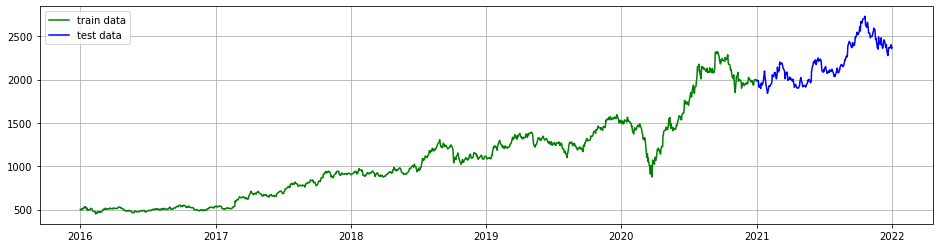

In [6]:
plt.figure(figsize=(16,4))
plt.grid(True)
plt.plot(df[:]['Close'],'green',label='train data')
plt.plot(test_data[:]['Close'],'blue',label='test data')
plt.legend()

p,d,q calculation

In [7]:
from statsmodels.tsa.stattools import adfuller

In [8]:
result=adfuller(df.Close.dropna())
print("AdY statistics",result[0])
print("p-value",result[1])

AdY statistics -0.3527863205306352
p-value 0.9176883509932816


d=no of differences,
p=pacf,
q=acf

In [9]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

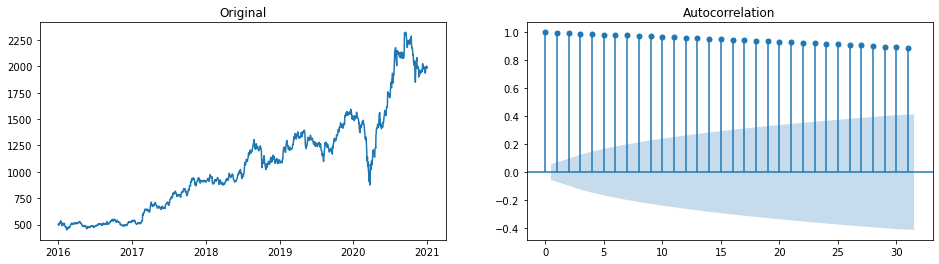

In [10]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(df.Close)
ax1.set_title("Original")
plot_acf(df.Close,ax=ax2);

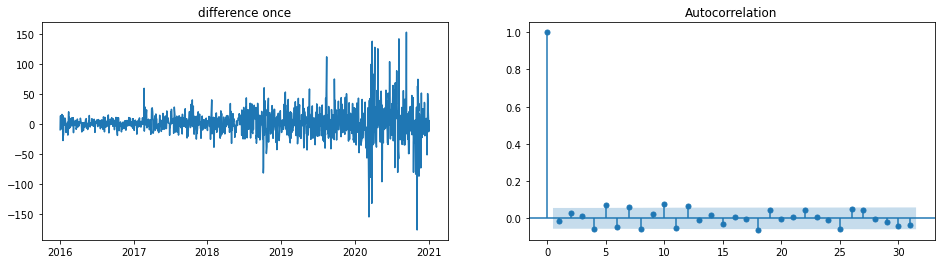

In [11]:
diff=df.Close.diff().dropna()
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(diff)
ax1.set_title("difference once")
plot_acf(diff,ax=ax2);

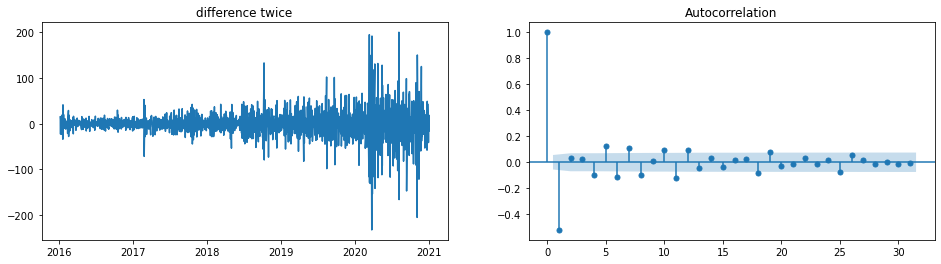

In [12]:
diff=df.Close.diff().diff().dropna()
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(diff)
ax1.set_title("difference twice")
plot_acf(diff,ax=ax2);

inbuild library to find d value

In [13]:
from pmdarima.arima.utils import ndiffs

In [14]:
d=df.copy()
ndiffs(d.Close,test="adf")

1

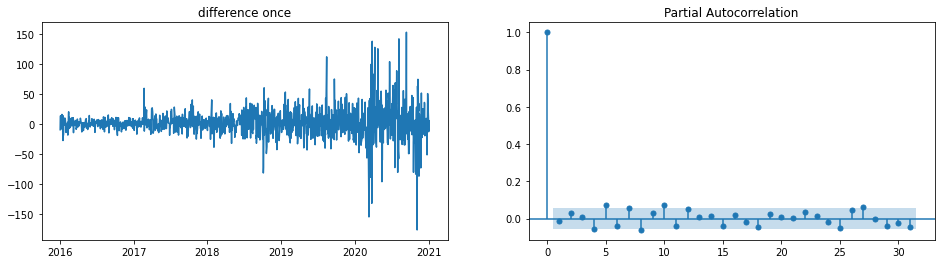

In [15]:
diff=df.Close.diff().dropna()
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(diff)
ax1.set_title("difference once")

plot_pacf(diff,ax=ax2);

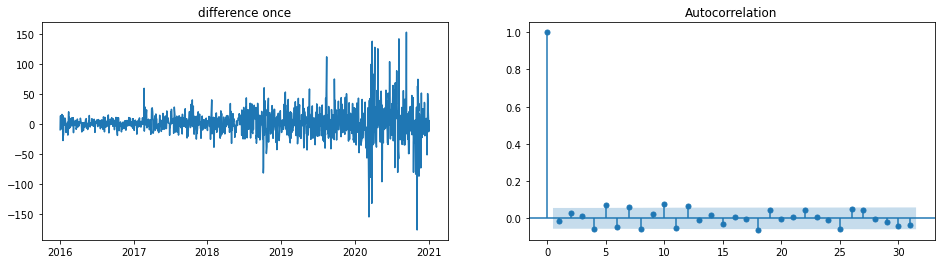

In [16]:
diff=df.Close.diff().dropna()
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(diff)
ax1.set_title("difference once")

plot_acf(diff,ax=ax2);

In [17]:
model_prediction=[]
n_test_obser=len(test)

In [18]:
from statsmodels.tsa.arima_model import ARIMA

In [19]:
for i in range(n_test_obser-20):
    model=ARIMA(train,order=(5,1,0))
    model_fit=model.fit()
    output=model_fit.forecast()
    yhat=list(output[0])[0]
    model_prediction.append(yhat)
    actual_test_value=test[i]
    train.append(actual_test_value)
    

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [20]:
length=len(test)

In [21]:
fore=[]
for i in range(20):
    model=ARIMA(train,order=(5,1,0))
    model_fit=model.fit()
    y=model_fit.forecast()
    train.append(test[length-20+i])
    fore.append(list(y[0])[0])
    

In [22]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                 1480
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -6917.159
Method:                       css-mle   S.D. of innovations             25.915
Date:                Sun, 20 Mar 2022   AIC                          13848.318
Time:                        17:59:36   BIC                          13885.416
Sample:                             1   HQIC                         13862.147
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2533      0.677      1.852      0.064      -0.073       2.580
ar.L1.D.y      0.0053      0.026      0.204      0.838      -0.046       0.056
ar.L2.D.y      0.0322      0.026      1.240      0.215      -0.019       0.083
ar.L3.D.y     -0.0434      0.026     -1.671      0.095      -0.094       0.008
ar.L4.D.y     -0.0212      0.026     -0.815      0.415      -0.072       0.030
ar.L5.D.y      0.0316      0.026      1.215      0.224      -0.019       0.082
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.6107           -1.0572j            1.9267           -0.4076
AR.2           -1.6107           +1.0572j            1.9267            0.4076
AR.3            0.8131           -1.7621j            1.9407           -0.1812
AR.4            0.8131           +1.7621j            1.9407            0.1812
AR.5            2.2659           -0.0000j            2.2659           -0.0000
-----------------------------------------------------------------------------
"""

In [23]:
len(test)

248

graph between actual predicted and forecasted


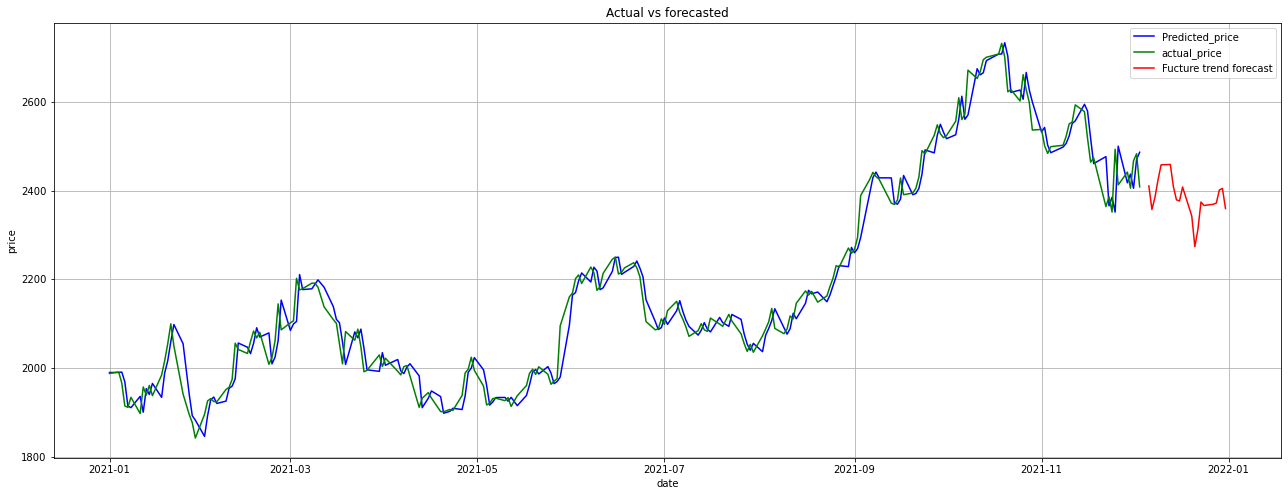

In [24]:
plt.figure(figsize=(22,8))
plt.grid(True)
data_range=test_data.index
plt.plot(data_range[:-20],model_prediction[:],color='blue',label='Predicted_price')
plt.plot(data_range[:-20],test[:-20],color='green',label='actual_price')
plt.plot(data_range[-20:],fore[:],color='red',label='Fucture trend forecast')
plt.xlabel('date')
plt.ylabel('price')
plt.title('Actual vs forecasted')
plt.legend()


actual vs forecasted for 20 days

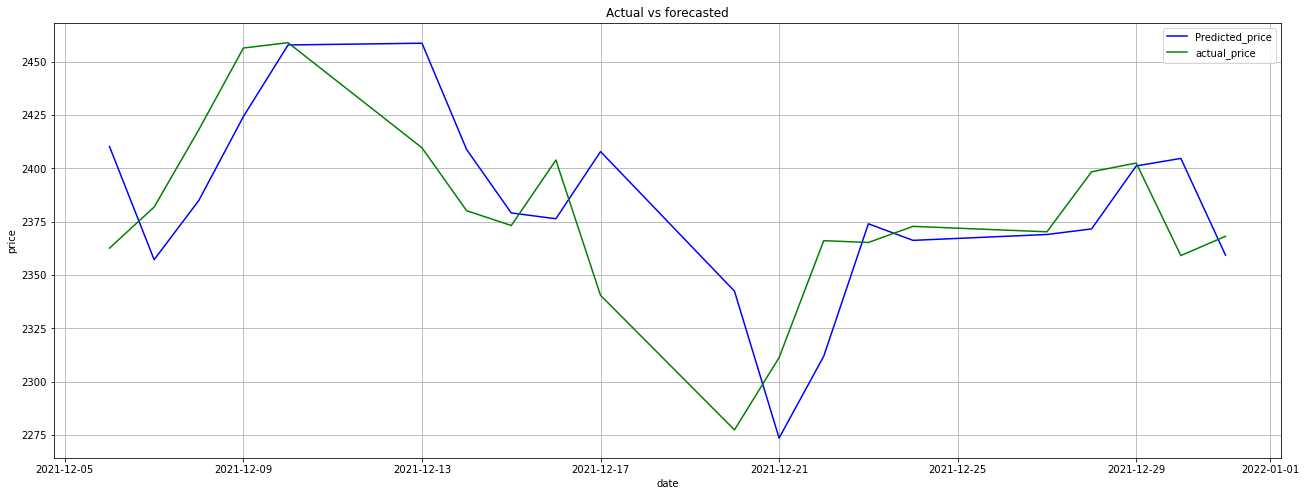

In [25]:
plt.figure(figsize=(22,8))
plt.grid(True)
data_range=test_data.index
plt.plot(data_range[-20:],fore[:],color='blue',label='Predicted_price')
plt.plot(data_range[-20:],test[-20:],color='green',label='actual_price')

plt.xlabel('date')
plt.ylabel('price')
plt.title('Actual vs forecasted')
plt.legend()


Error calculation

In [26]:
date=pd.to_datetime(data_range)

In [27]:
len(test)

248

In [28]:
dif=[]
for i in range(20):
    dif.append(test[length-20+i]-fore[i])

In [29]:
print ("{:<25} {:<25} {:<25} {:<38}".format('Date','Actual','Predicted','difference'))
for i in range(20):
   # print(test[228+i],"        ",ans[i], "        =", dif[i])
    print ("{}    {:<25} {:<25}=  {:<25}".format(data_range[length-20+i],test[length-20+i],fore[i],dif[i]))

Date                      Actual                    Predicted                 difference                            
2021-12-06 00:00:00    2362.60009765625          2410.2354007527038       =  -47.635303096453754      
2021-12-07 00:00:00    2381.85009765625          2357.1713606755684       =  24.678736980681606       
2021-12-08 00:00:00    2418.10009765625          2384.911361411155        =  33.18873624509479        
2021-12-09 00:00:00    2456.449951171875         2424.3223582828105       =  32.127592889064545       
2021-12-10 00:00:00    2458.949951171875         2457.8792477539555       =  1.0707034179195034       
2021-12-13 00:00:00    2409.64990234375          2458.7025866131          =  -49.05268426934981       
2021-12-14 00:00:00    2380.14990234375          2408.851306515332        =  -28.701404171582         
2021-12-15 00:00:00    2373.199951171875         2379.0893747636037       =  -5.889423591728701       
2021-12-16 00:00:00    2403.89990234375          2376.37543

In [30]:
from sklearn.metrics import mean_squared_error
mean_squa=mean_squared_error(test[length-20:length],fore[:20])
mean_squa

1258.714073686533

In [31]:
import math
root_mean_squa=math.sqrt(mean_squa)
root_mean_squa

35.47836063978342